In [1]:
import os
import flexynesis
import torch
import numpy as np
import seaborn as sns
import pandas as pd
import random
import lightning as pl

Seed set to 42


In [2]:
data_importer = flexynesis.DataImporter(path ='lgggbm_tcga_pub_processed', 
                                        data_types = ['mut', 'cna'], log_transform=False, 
                                        concatenate=False, top_percentile=10, min_features=1000, correlation_threshold=0.8, 
                                       variance_threshold=0.5)
train_dataset, test_dataset = data_importer.import_data()


[INFO] ================= Importing Data =================
[INFO] Validating data folders...

[INFO] ----------------- Reading Data ----------------- 
[INFO] Importing lgggbm_tcga_pub_processed/train/mut.csv...
[INFO] Importing lgggbm_tcga_pub_processed/train/cna.csv...
[INFO] Importing lgggbm_tcga_pub_processed/train/clin.csv...

[INFO] ----------------- Reading Data ----------------- 
[INFO] Importing lgggbm_tcga_pub_processed/test/mut.csv...
[INFO] Importing lgggbm_tcga_pub_processed/test/cna.csv...
[INFO] Importing lgggbm_tcga_pub_processed/test/clin.csv...

[INFO] ----------------- Checking for problems with the input data ----------------- 
[INFO] Data structure is valid with no errors or warnings.

[INFO] ----------------- Processing Data (train) ----------------- 

[INFO] ----------------- Cleaning Up Data ----------------- 

[INFO] working on layer:  mut
[INFO] Number of NA values:  0
[INFO] DataFrame mut - Removed 5561 features.

[INFO] working on layer:  cna
[INFO] Number of

Filtering redundant features: 100%|██████████| 1000/1000 [00:00<00:00, 12764.47it/s]


[INFO] Implementing feature selection using laplacian score for layer: cna with  12371 features  and  556  samples 


Filtering redundant features: 100%|██████████| 1237/1237 [00:00<00:00, 223838.56it/s]



[INFO] ----------------- Processing Data (test) ----------------- 

[INFO] ----------------- Cleaning Up Data ----------------- 

[INFO] working on layer:  mut
[INFO] Number of NA values:  0
[INFO] DataFrame mut - Removed 5627 features.

[INFO] working on layer:  cna
[INFO] Number of NA values:  0
[INFO] DataFrame cna - Removed 12382 features.
[INFO] DataFrame mut - Removed 0 samples (0.00%).
[INFO] DataFrame cna - Removed 0 samples (0.00%).

[INFO] ----------------- Harmonizing Data Sets ----------------- 

[INFO] ----------------- Finished Harmonizing ----------------- 

[INFO] ----------------- Normalizing Data ----------------- 

[INFO] ----------------- Normalizing Data ----------------- 
[INFO] Training Data Stats:  {'feature_count in: cna': 1237, 'feature_count in: mut': 322, 'sample_count': 556}
[INFO] Test Data Stats:  {'feature_count in: cna': 1237, 'feature_count in: mut': 322, 'sample_count': 238}
[INFO] Merging Feature Logs...
[INFO] Data import successful.


In [146]:
train_dataset.features

{'cna': Index(['SLC30A8', 'ZNF273', 'TAS2R38', 'AGL', 'KCNA5', 'MIR603', 'SNTB1',
        'MTBP', 'MRPL13', 'SNORA72|ENSG00000252158.1',
        ...
        'CAV1', 'FZD1', 'BCAP29', 'MNX1', 'ADAM22', 'LRP8', 'NOM1', 'RN7SL290P',
        'CPA1', 'snoU13|ENSG00000239044.1'],
       dtype='object', length=1237),
 'mut': Index(['IDH2', 'IDH1', 'ATRX', 'RELN', 'PIK3CA', 'EGFR', 'TP53', 'COL6A3',
        'TEKT4', 'SVIL',
        ...
        'PPM1H', 'NAGA', 'CAMKK1', 'PTPN6', 'SEPT12', 'CD300LD-AS1', 'RGAG4',
        'NYAP2', 'NEURL1', 'ZNF571'],
       dtype='object', length=322)}

In [ ]:
### 1.1 Print the shapes of the available data matrices 

print (len(train_dataset.samples),len(train_dataset.features),train_dataset.features['cna'].shape,train_dataset.features['mut'].shape)
print (len(test_dataset.samples),len(test_dataset.features),test_dataset.features['cna'].shape,test_dataset.features['mut'].shape)

556 2 (1237,) (322,)
238 2 (1237,) (322,)


In [17]:
# What are the available clinical variables? Are they available in both train and test datasets? (See <dataset>.ann)  
print (train_dataset.ann.keys())
print (test_dataset.ann.keys())


dict_keys(['AGE', 'OS_MONTHS', 'OS_STATUS', 'KARNOFSKY_PERFORMANCE_SCORE', 'STUDY', 'BCR_STATUS', 'HISTOLOGICAL_DIAGNOSIS', 'SEX'])
dict_keys(['AGE', 'OS_MONTHS', 'OS_STATUS', 'KARNOFSKY_PERFORMANCE_SCORE', 'STUDY', 'BCR_STATUS', 'HISTOLOGICAL_DIAGNOSIS', 'SEX'])


<Axes: xlabel='OS_MONTHS', ylabel='Count'>

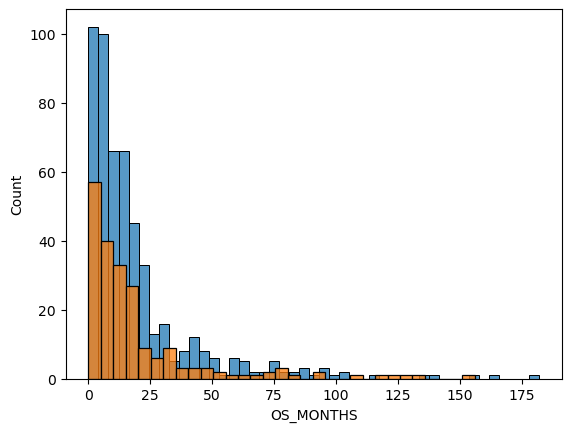

In [23]:
# - Make a histogram plot of the follow up times in months (OS_MONTHS) (use sns.histplot)
sns.histplot(data = train_dataset.ann, x="OS_MONTHS")
sns.histplot(data = test_dataset.ann, x="OS_MONTHS")


/public/home/liujunwu/software/miniconda3/envs/ame/lib/python3.11/site-packages/flexynesis/utils.py:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



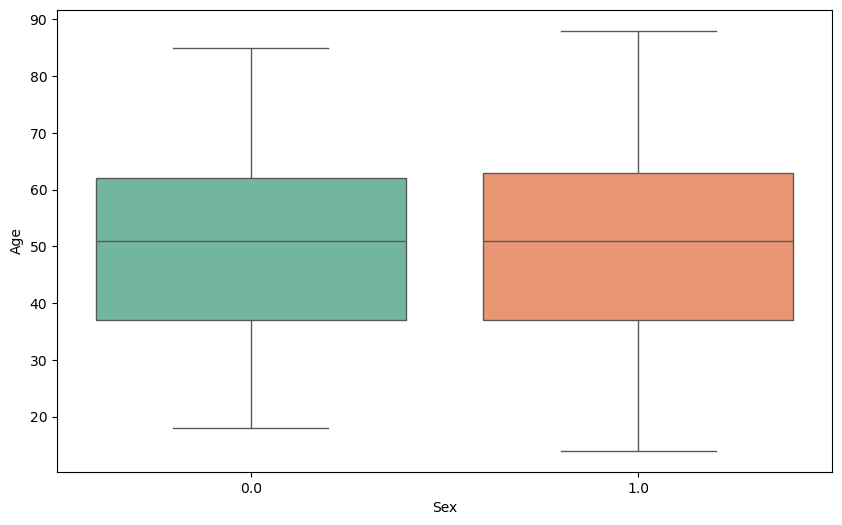

In [139]:
## Make a histogram of the age distribution of the patients in the training data; facet the histogram by "SEX" variable (see flexynesis.utils.plot_boxplot)
flexynesis.utils.plot_boxplot(train_dataset.ann['SEX'], train_dataset.ann['AGE'], 'Sex', 'Age')
#plot_boxplot(train_dataset.ann['SEX'], train_dataset.ann['AGE'], 'SEX', 'Age')


In [41]:
# Make a summary of all available clinical variables (see flexynesis.print_summary_stats)
print (flexynesis.print_summary_stats(train_dataset))
print (flexynesis.print_summary_stats(test_dataset))



Summary for variable: AGE
Numerical Variable Summary: Median = 51.0, Mean = 50.33781190019194
------
Summary for variable: OS_MONTHS
Numerical Variable Summary: Median = 11.6, Mean = 19.09097888675624
------
Summary for variable: OS_STATUS
Numerical Variable Summary: Median = 0.0, Mean = 0.36153846153846153
------
Summary for variable: KARNOFSKY_PERFORMANCE_SCORE
Numerical Variable Summary: Median = 80.0, Mean = 82.45454545454545
------
Summary for variable: STUDY
Categorical Variable Summary:
  Label: Brain Lower Grade Glioma, Count: 353
  Label: Glioblastoma multiforme, Count: 203
------
Summary for variable: BCR_STATUS
Categorical Variable Summary:
  Label: IGC, Count: 454
  Label: NCH, Count: 102
------
Summary for variable: HISTOLOGICAL_DIAGNOSIS
Categorical Variable Summary:
  Label: astrocytoma, Count: 115
  Label: glioblastoma, Count: 201
  Label: oligoastrocytoma, Count: 79
  Label: oligodendroglioma, Count: 126
  Label: nan, Count: 35
------
Summary for variable: SEX
Categori

In [46]:
train_dataset.label_mappings

{'STUDY': {0: 'Brain Lower Grade Glioma', 1: 'Glioblastoma multiforme'},
 'BCR_STATUS': {0: 'IGC', 1: 'NCH'},
 'HISTOLOGICAL_DIAGNOSIS': {0: 'astrocytoma',
  1: 'glioblastoma',
  2: 'oligoastrocytoma',
  3: 'oligodendroglioma',
  4: nan},
 'SEX': {0: 'Female', 1: 'Male', 2: nan}}

In [99]:
# Notice that the categorical variables such as "SEX", "STUDY", "HISTOLOGICAL_DIAGNOSIS" are encoded numerically in the "dataset.ann" objects. Use dataset.label_mappings to map the STUDY variable to their original labels. 
# Print the top 10 values in dataset.ann['STUDY'] and the mapped label values. 
f = 'STUDY'
labels = [train_dataset.label_mappings[f][x] for x in train_dataset.ann[f].numpy()] 
print (train_dataset.ann[f][0:10])
print (labels[0:10])

tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0.], dtype=torch.float64)
['Brain Lower Grade Glioma', 'Brain Lower Grade Glioma', 'Brain Lower Grade Glioma', 'Glioblastoma multiforme', 'Brain Lower Grade Glioma', 'Brain Lower Grade Glioma', 'Glioblastoma multiforme', 'Brain Lower Grade Glioma', 'Brain Lower Grade Glioma', 'Brain Lower Grade Glioma']


In [ ]:
df = pd.DataFrame(train_dataset.dat['cna'], index = train_dataset.samples, columns= train_dataset.features['cna'])
df.head()


,SLC30A8,ZNF273,TAS2R38,AGL,KCNA5,MIR603,SNTB1,MTBP,MRPL13,SNORA72|ENSG00000252158.1,...,CAV1,FZD1,BCAP29,MNX1,ADAM22,LRP8,NOM1,RN7SL290P,CPA1,snoU13|ENSG00000239044.1
TCGA-E1-A7YD,-0.461961,1.437397,1.485329,1.883245,-0.241659,-0.816959,-0.474189,-0.474026,-0.474026,-1.850124,...,1.481851,1.488807,1.501073,1.479111,1.390277,1.900297,1.478852,1.925268,1.425489,1.425489
TCGA-TM-A84R,-0.246242,-0.743652,-0.867035,-0.574910,-0.204420,0.544251,-0.255020,-0.254862,-0.254862,-0.257498,...,-0.871113,-0.817392,-0.871596,-0.847691,-0.793655,-0.558607,-0.847873,-0.558659,-0.888492,-0.888492
TCGA-DU-A5TU,-0.162059,0.578005,0.558434,0.435514,5.631405,0.501643,-0.169491,-0.169334,-0.169334,-0.172416,...,0.554720,0.580102,0.566177,0.562288,0.529749,0.452125,0.562060,0.462359,0.513718,0.513718
TCGA-28-5204,0.364085,2.347218,2.466614,0.394771,-0.193781,-1.341709,0.365066,0.365213,0.365213,0.359346,...,2.463386,2.450834,2.490828,2.449732,2.301300,0.454842,2.449441,0.465103,2.390762,2.390762
TCGA-HT-7477,9.376923,-1.605145,-0.540696,0.223651,-0.116643,0.546493,8.052002,8.051995,8.051995,7.998103,...,-0.376945,-0.333046,-0.373290,-0.607838,-0.334987,0.240197,-0.608027,0.248274,-0.567477,-0.567477


/public/home/liujunwu/software/miniconda3/envs/ame/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


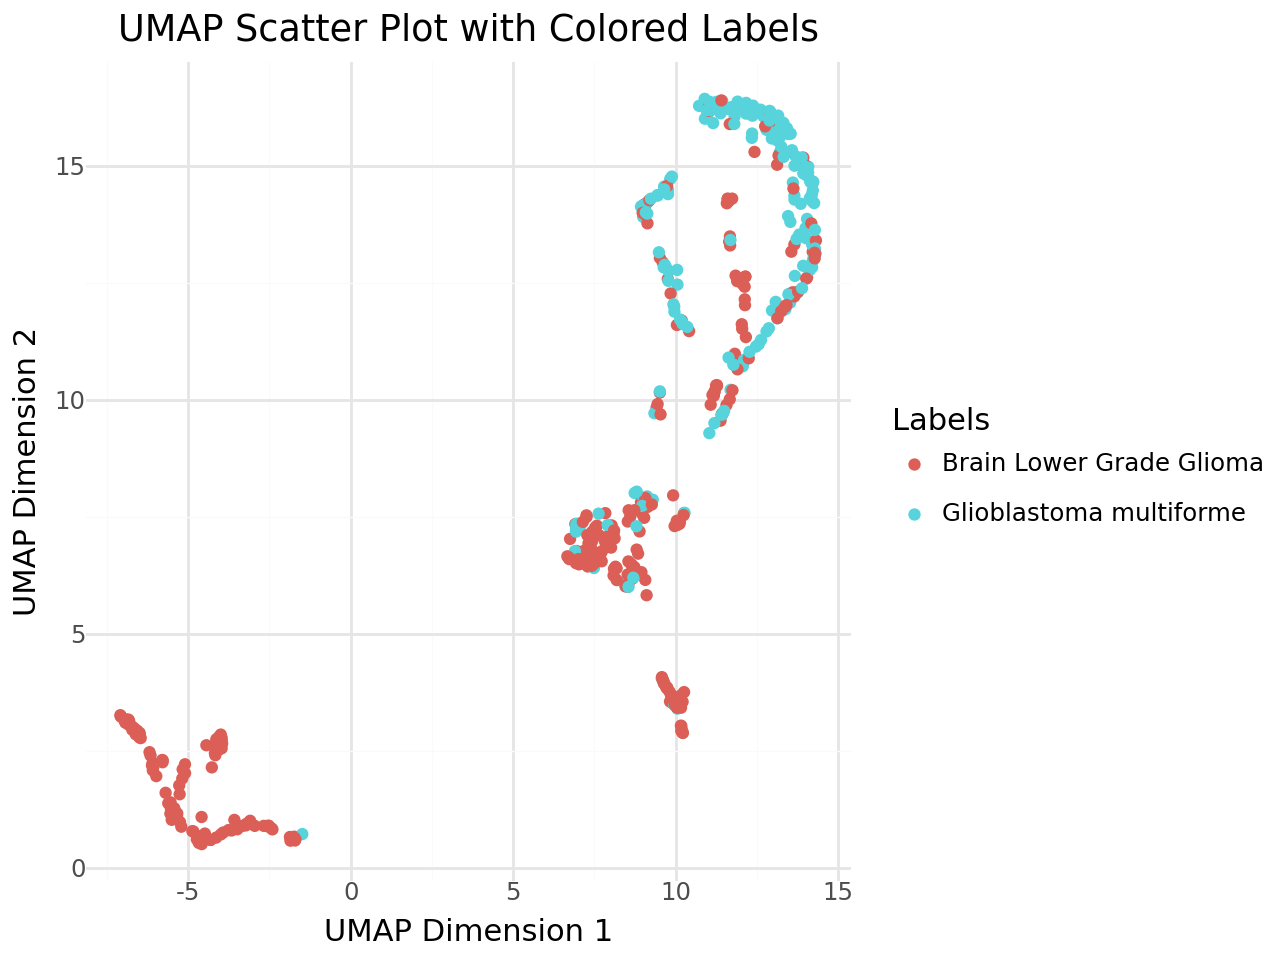

In [53]:
flexynesis.plot_dim_reduced(df, labels, color_type = 'categorical', method='umap')

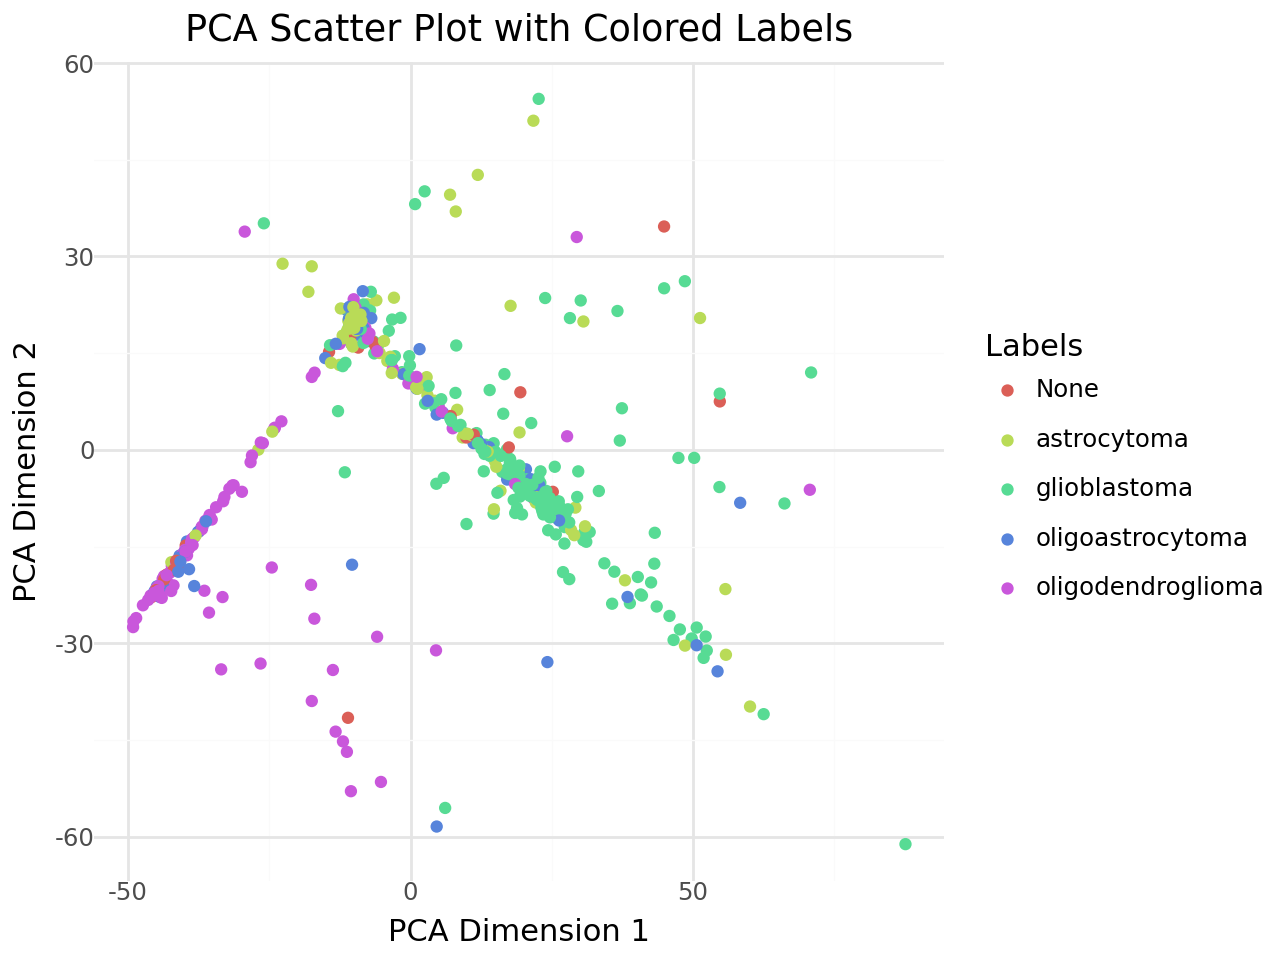

In [86]:
# (Optional exercise ideas): 
    # Make a PCA plot coloring the samples by HISTOLOGICAL_DIAGNOSIS, GENDER, or any other clinical variable 
    # Repeat the same exercise on the mutation data matrix. 
df2 = pd.DataFrame(train_dataset.dat['cna'], index = train_dataset.samples, columns= train_dataset.features['cna'])
f = 'HISTOLOGICAL_DIAGNOSIS'
labels = [train_dataset.label_mappings[f][x] if not np.isnan(x) else 'None' for x in train_dataset.ann[f].numpy()] 
#labels[0:10]
flexynesis.plot_dim_reduced(df2, labels, color_type = 'categorical', method='pca')

In [ ]:
flexynesis.em

flexynesis.models.direct_pred.DirectPred

In [148]:
train_dataset.variable_types

{'STUDY': 'categorical',
 'BCR_STATUS': 'categorical',
 'HISTOLOGICAL_DIAGNOSIS': 'categorical',
 'SEX': 'categorical',
 'AGE': 'numerical',
 'OS_MONTHS': 'numerical',
 'OS_STATUS': 'numerical',
 'KARNOFSKY_PERFORMANCE_SCORE': 'numerical'}

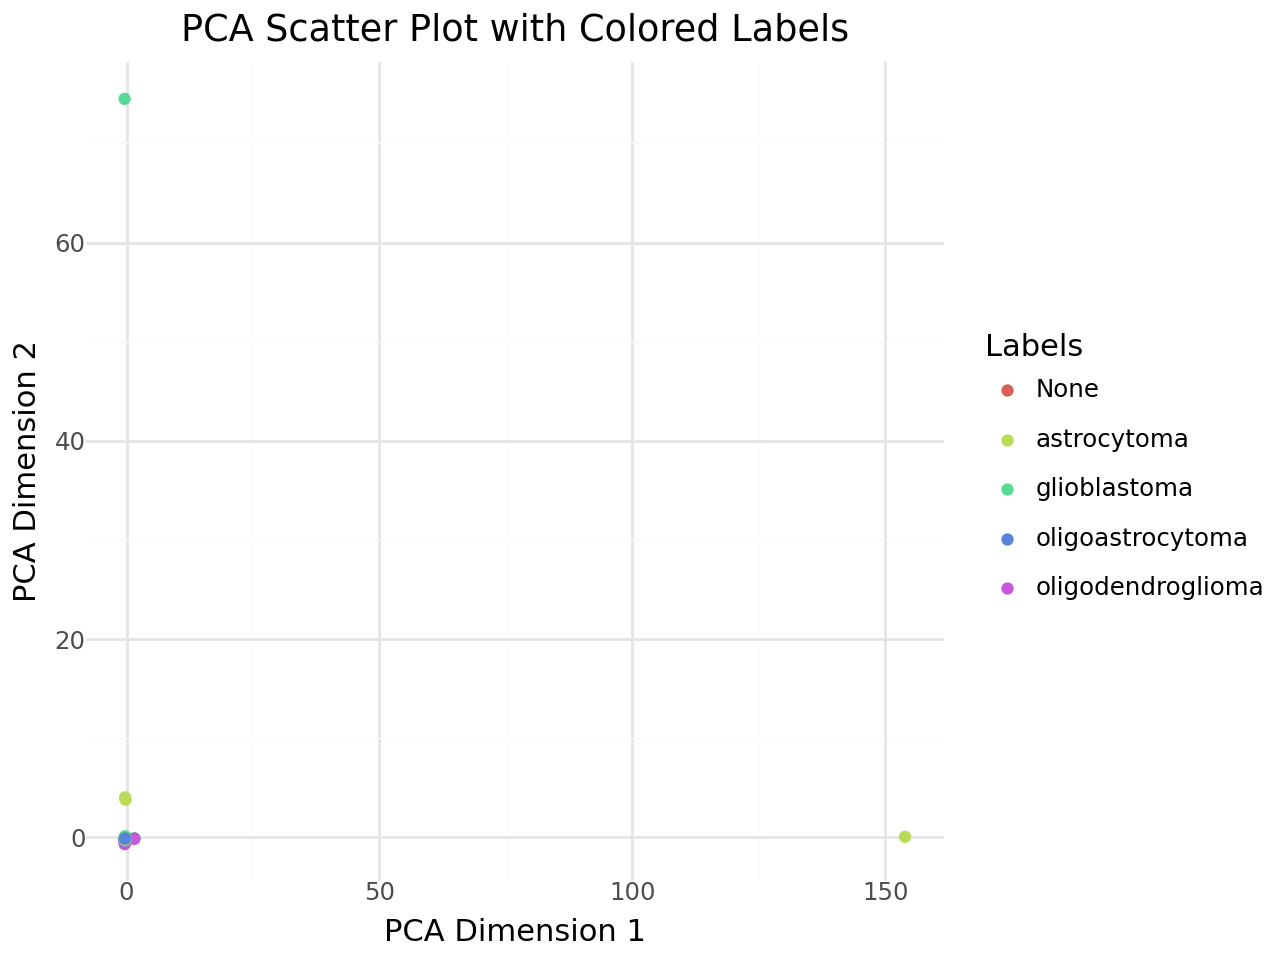

In [144]:
# Repeat the same exercise on the mutation data matrix. 
df2 = pd.DataFrame(train_dataset.dat['mut'], index = train_dataset.samples, columns= train_dataset.features['mut'])
f = 'HISTOLOGICAL_DIAGNOSIS'
labels = [train_dataset.label_mappings[f][x] if not np.isnan(x) else 'None' for x in train_dataset.ann[f].numpy()] 
#labels[0:10]
flexynesis.plot_dim_reduced(df2, labels, color_type = 'categorical', method='pca')

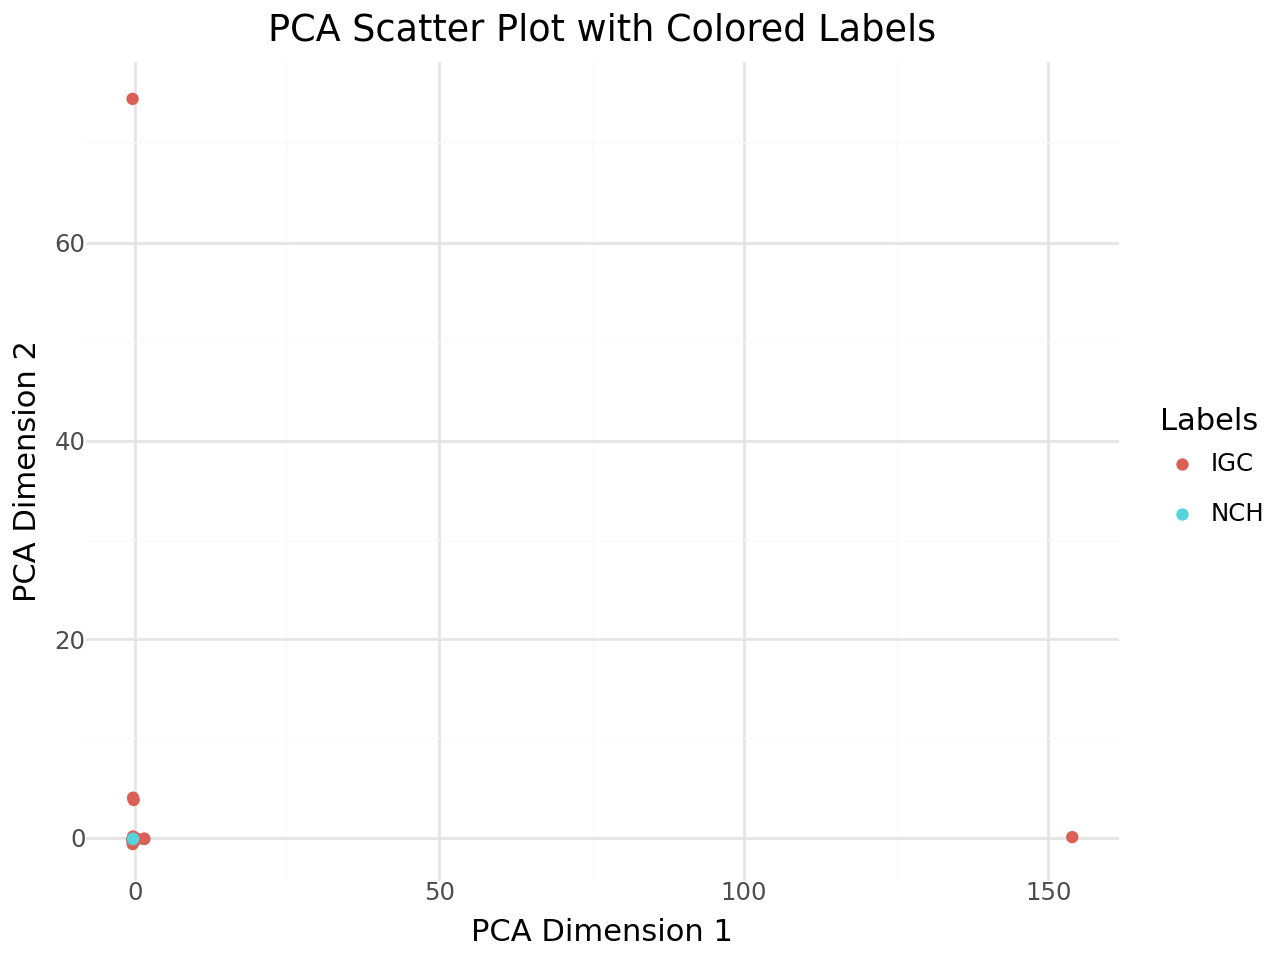

In [141]:
f = 'BCR_STATUS'
labels = [train_dataset.label_mappings[f][x] for x in train_dataset.ann[f].numpy()] 
#labels[0:10]
flexynesis.plot_dim_reduced(df2, labels, color_type = 'categorical', method='pca')

In [70]:
## 2. Training a single model using manually set hyperparameters 
# randomly assign 80% of samples for training, 20% for validation 
train_indices = random.sample(range(0, len(train_dataset)), int(len(train_dataset) * 0.8))
val_indices = list(set(range(len(train_dataset))) - set(train_indices))
train_subset = train_dataset.subset(train_indices)
val_subset = train_dataset.subset(val_indices)

# define data loaders for train/validation splits 
from torch.utils.data import DataLoader
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True) 
val_loader = DataLoader(val_subset, batch_size=32, shuffle = False) 

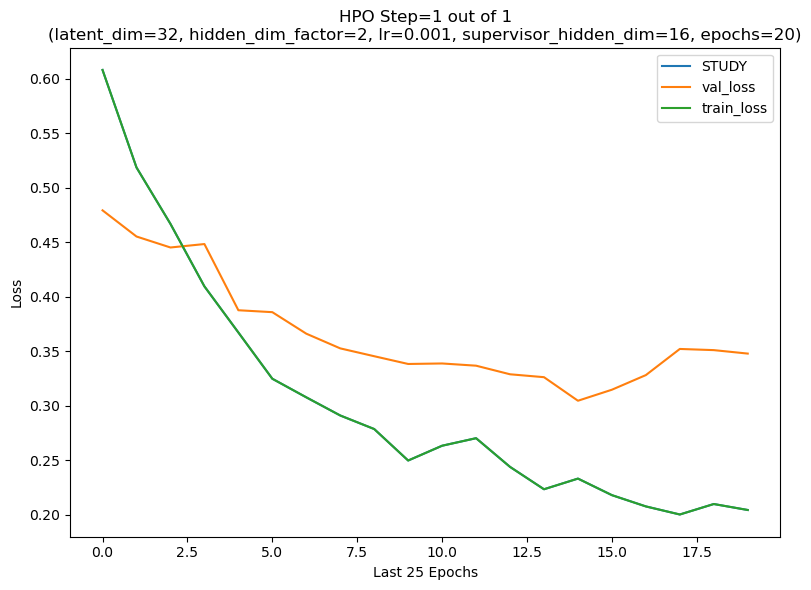

`Trainer.fit` stopped: `max_epochs=20` reached.


In [73]:
# lightning-trainer fit
# Define a model with manually set hyperparameters for the DirectPred model 
myparams = {'latent_dim': 32, 'hidden_dim_factor': 2, 'lr': 0.001, 'supervisor_hidden_dim': 16, 'epochs': 20}
model = flexynesis.DirectPred(config = myparams, dataset = train_dataset, target_variables=['STUDY'])   
trainer = pl.Trainer(max_epochs=myparams['epochs'], default_root_dir="./", logger=False, enable_checkpointing=False, 
                     callbacks=[flexynesis.LiveLossPlot(myparams, 1, 1)])
# Fit the model 
trainer.fit(model, train_loader, val_loader)

In [74]:
# evaluate the model performance on predicting the target variable
flexynesis.evaluate_wrapper("DirectPred", model.predict(test_dataset), test_dataset)

,method,var,variable_type,metric,value
0,DirectPred,STUDY,categorical,balanced_acc,0.797386
1,DirectPred,STUDY,categorical,f1_score,0.808084
2,DirectPred,STUDY,categorical,kappa,0.585586
3,DirectPred,STUDY,categorical,average_auroc,0.858747
4,DirectPred,STUDY,categorical,average_aupr,0.738054


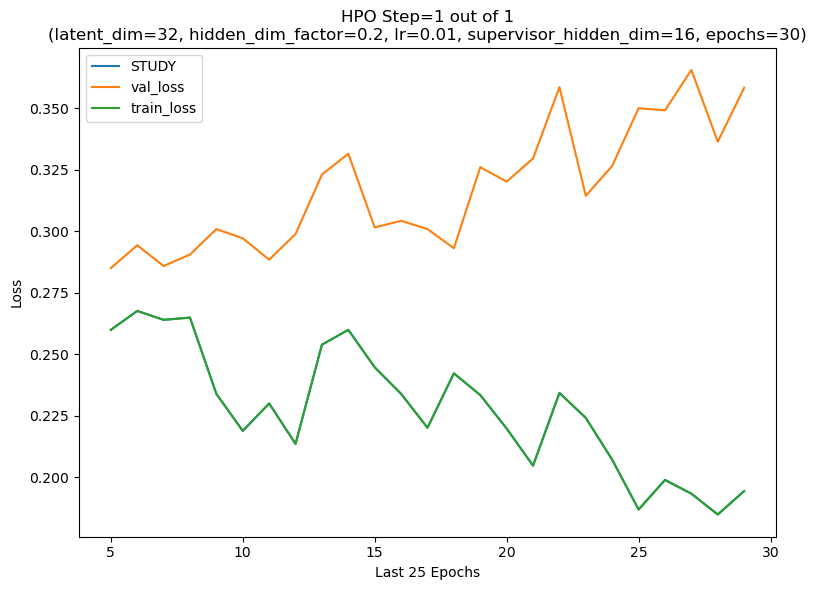

`Trainer.fit` stopped: `max_epochs=30` reached.


,method,var,variable_type,metric,value
0,DirectPred,STUDY,categorical,balanced_acc,0.725490
1,DirectPred,STUDY,categorical,f1_score,0.759295
2,DirectPred,STUDY,categorical,kappa,0.468114
3,DirectPred,STUDY,categorical,average_auroc,0.843214
4,DirectPred,STUDY,categorical,average_aupr,0.698720


In [ ]:
## 2.1 Exercise - 1 (seems like overfitting)
# Define a model with manually set hyperparameters for the DirectPred model (Try at least 5 different combinations)
myparams = {'latent_dim': 32, 'hidden_dim_factor': 0.2, 'lr': 0.01, 'supervisor_hidden_dim': 16, 'epochs': 30}
model = flexynesis.DirectPred(config = myparams, dataset = train_dataset, target_variables=['STUDY'])   
trainer = pl.Trainer(max_epochs=myparams['epochs'], default_root_dir="./", logger=False, enable_checkpointing=False, 
                     callbacks=[flexynesis.LiveLossPlot(myparams, 1, 1)])
# Fit the model 
trainer.fit(model, train_loader, val_loader)
flexynesis.evaluate_wrapper("DirectPred", model.predict(test_dataset), test_dataset)

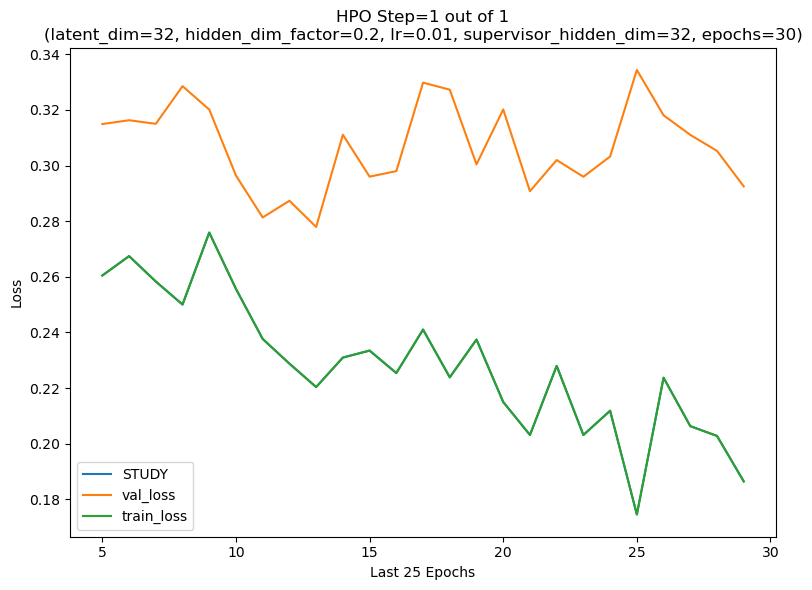

`Trainer.fit` stopped: `max_epochs=30` reached.


,method,var,variable_type,metric,value
0,DirectPred,STUDY,categorical,balanced_acc,0.732680
1,DirectPred,STUDY,categorical,f1_score,0.758801
2,DirectPred,STUDY,categorical,kappa,0.471523
3,DirectPred,STUDY,categorical,average_auroc,0.846059
4,DirectPred,STUDY,categorical,average_aupr,0.693838


In [82]:
## 2.1 Exercise - 2
# Define a model with manually set hyperparameters for the DirectPred model (Try at least 5 different combinations)
myparams = {'latent_dim': 32, 'hidden_dim_factor': 0.2, 'lr': 0.01, 'supervisor_hidden_dim': 32, 'epochs': 30}
model = flexynesis.DirectPred(config = myparams, dataset = train_dataset, target_variables=['STUDY'])   
trainer = pl.Trainer(max_epochs=myparams['epochs'], default_root_dir="./", logger=False, enable_checkpointing=False, 
                     callbacks=[flexynesis.LiveLossPlot(myparams, 1, 1)])
# Fit the model 
trainer.fit(model, train_loader, val_loader)
flexynesis.evaluate_wrapper("DirectPred", model.predict(test_dataset), test_dataset)

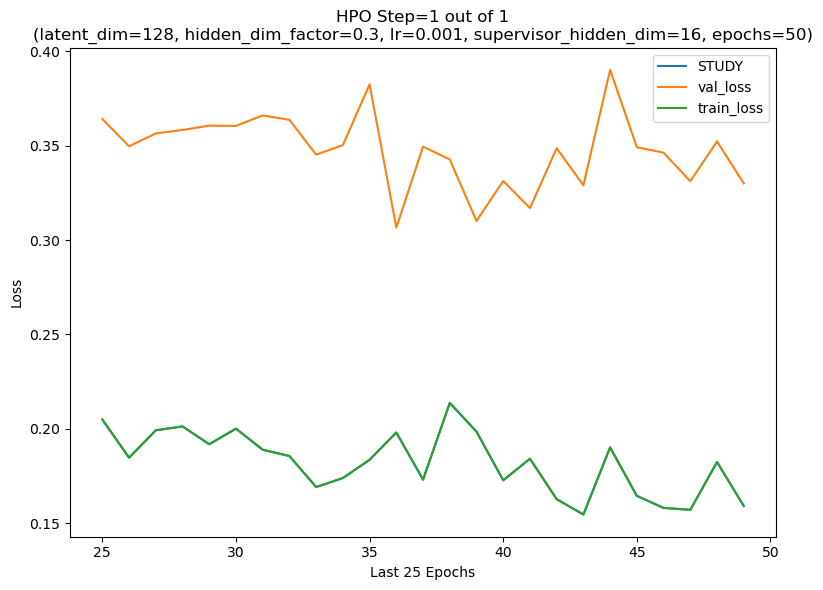

`Trainer.fit` stopped: `max_epochs=50` reached.


,method,var,variable_type,metric,value
0,DirectPred,STUDY,categorical,balanced_acc,0.781046
1,DirectPred,STUDY,categorical,f1_score,0.801706
2,DirectPred,STUDY,categorical,kappa,0.566535
3,DirectPred,STUDY,categorical,average_auroc,0.851596
4,DirectPred,STUDY,categorical,average_aupr,0.714762


In [79]:
## 2.1 Exercise - 3
# Define a model with manually set hyperparameters for the DirectPred model (Try at least 5 different combinations)
myparams = {'latent_dim': 128, 'hidden_dim_factor': 0.3, 'lr': 0.001, 'supervisor_hidden_dim': 16, 'epochs': 50}
model = flexynesis.DirectPred(config = myparams, dataset = train_dataset, target_variables=['STUDY'])   
trainer = pl.Trainer(max_epochs=myparams['epochs'], default_root_dir="./", logger=False, enable_checkpointing=False, 
                     callbacks=[flexynesis.LiveLossPlot(myparams, 1, 1)])
# Fit the model 
trainer.fit(model, train_loader, val_loader)
flexynesis.evaluate_wrapper("DirectPred", model.predict(test_dataset), test_dataset)

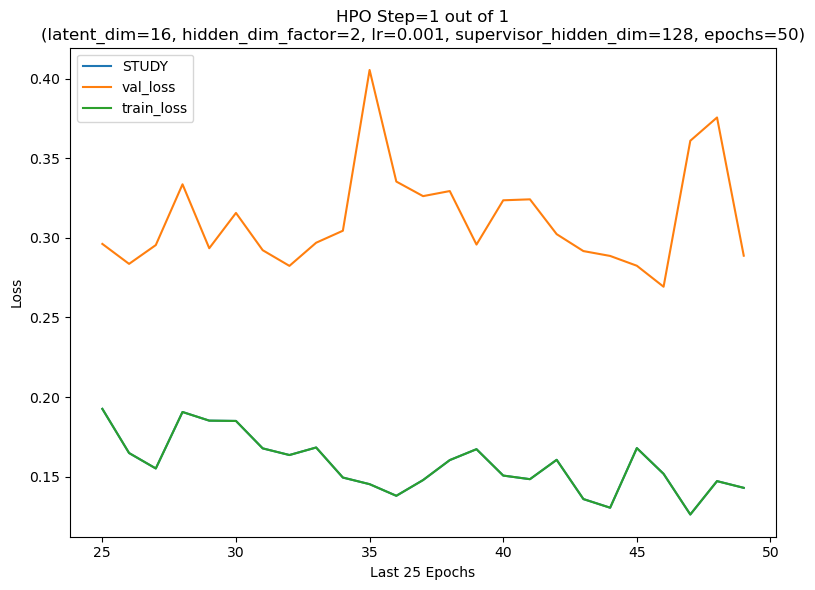

`Trainer.fit` stopped: `max_epochs=50` reached.


,method,var,variable_type,metric,value
0,DirectPred,STUDY,categorical,balanced_acc,0.820915
1,DirectPred,STUDY,categorical,f1_score,0.839443
2,DirectPred,STUDY,categorical,kappa,0.648613
3,DirectPred,STUDY,categorical,average_auroc,0.889965
4,DirectPred,STUDY,categorical,average_aupr,0.752811


In [ ]:
## 2.1 Exercise - 4
# Define a model with manually set hyperparameters for the DirectPred model (Try at least 5 different combinations)
myparams = {'latent_dim': 16, 'hidden_dim_factor': 2, 'lr': 0.001, 'supervisor_hidden_dim': 128, 'epochs': 50}
model = flexynesis.DirectPred(config = myparams, dataset = train_dataset, target_variables=['STUDY'])   
trainer = pl.Trainer(max_epochs=myparams['epochs'], default_root_dir="./", logger=False, enable_checkpointing=False, 
                     callbacks=[flexynesis.LiveLossPlot(myparams, 1, 1)])
# Fit the model 
trainer.fit(model, train_loader, val_loader)
flexynesis.evaluate_wrapper("DirectPred", model.predict(test_dataset), test_dataset)

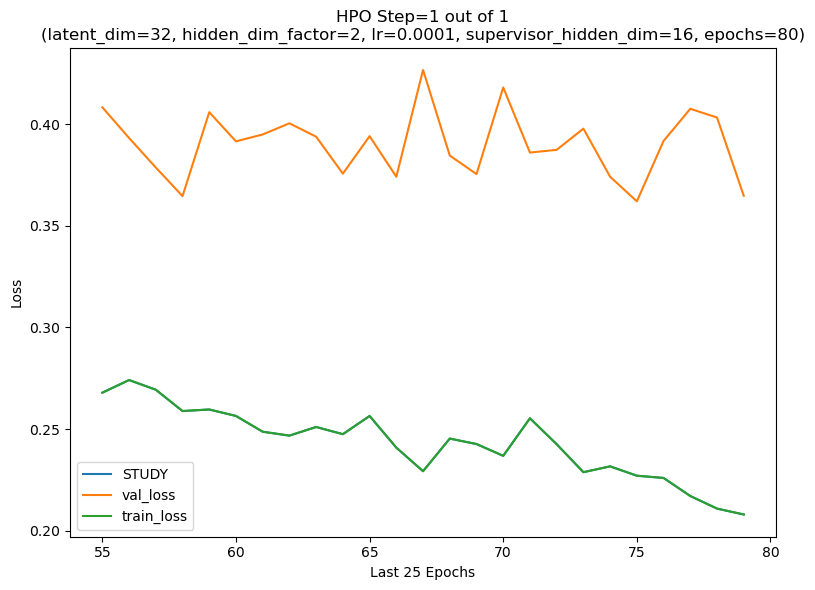

`Trainer.fit` stopped: `max_epochs=80` reached.


,method,var,variable_type,metric,value
0,DirectPred,STUDY,categorical,balanced_acc,0.769935
1,DirectPred,STUDY,categorical,f1_score,0.795909
2,DirectPred,STUDY,categorical,kappa,0.551402
3,DirectPred,STUDY,categorical,average_auroc,0.873356
4,DirectPred,STUDY,categorical,average_aupr,0.736196


In [101]:
## 2.1 Exercise - 5 (lower learning rate)
# Define a model with manually set hyperparameters for the DirectPred model (Try at least 5 different combinations)
myparams = {'latent_dim': 32, 'hidden_dim_factor': 2, 'lr': 0.0001, 'supervisor_hidden_dim': 16, 'epochs': 80}
model = flexynesis.DirectPred(config = myparams, dataset = train_dataset, target_variables=['STUDY'])   
trainer = pl.Trainer(max_epochs=myparams['epochs'], default_root_dir="./", logger=False, enable_checkpointing=False, 
                     callbacks=[flexynesis.LiveLossPlot(myparams, 1, 1)])
# Fit the model 
trainer.fit(model, train_loader, val_loader)
flexynesis.evaluate_wrapper("DirectPred", model.predict(test_dataset), test_dataset)

## 3. Automating the Hyperparameter Optimisation Procedure

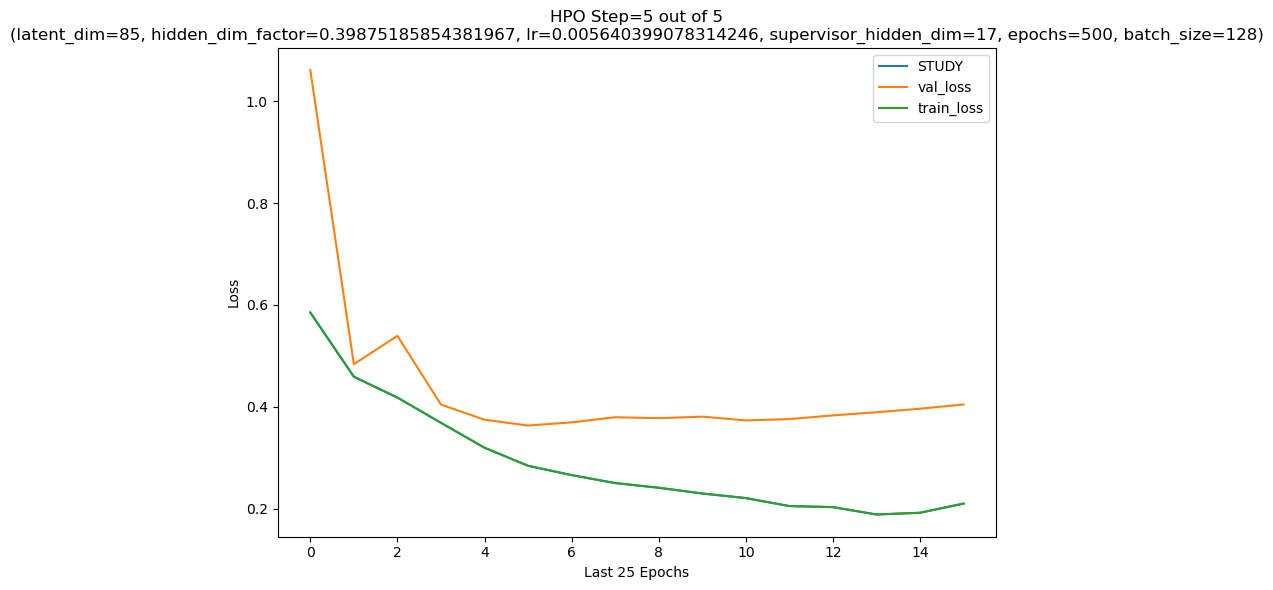

Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           STUDY           │    0.4043911099433899     │
│         val_loss          │    0.4043911099433899     │
└───────────────────────────┴───────────────────────────┘

Tuning Progress: 100%|██████████| 5/5 [00:31<00:00,  6.38s/it, Iteration=5, Best Loss=0.368]

[INFO] current best val loss: 0.36800625920295715; best params: {'latent_dim': np.int64(24), 'hidden_dim_factor': 0.24990817438570342, 'lr': 0.003199288883180508, 'supervisor_hidden_dim': np.int64(28), 'epochs': 500, 'batch_size': np.int64(32)} since 4 hpo iterations


In [ ]:
# Define a tuner; See n_iter is the number of 
myparams = {'latent_dim': 32, 'hidden_dim_factor': 2, 'lr': 0.0001, 'supervisor_hidden_dim': 16, 'epochs': 80}
tuner = flexynesis.HyperparameterTuning(train_dataset, 
                                        model_class = flexynesis.DirectPred, 
                                        config_name = "DirectPred",
                                        target_variables = ['STUDY'], 
                                        n_iter=5, 
                                        plot_losses=True, 
                                        early_stop_patience=10)
### Perform Training 
model, best_params = tuner.perform_tuning()

In [103]:
## See which hyperparameter combination was the best 
best_params

{'latent_dim': np.int64(24),
 'hidden_dim_factor': 0.24990817438570342,
 'lr': 0.003199288883180508,
 'supervisor_hidden_dim': np.int64(28),
 'epochs': 14,
 'batch_size': np.int64(32)}

In [104]:
## Evaluate the model and visualising the results
flexynesis.evaluate_wrapper(method = 'DirectPred', y_pred_dict=model.predict(test_dataset), dataset = test_dataset, 
                            surv_event_var=model.surv_event_var, surv_time_var=model.surv_time_var)                            

,method,var,variable_type,metric,value
0,DirectPred,STUDY,categorical,balanced_acc,0.754902
1,DirectPred,STUDY,categorical,f1_score,0.756356
2,DirectPred,STUDY,categorical,kappa,0.485679
3,DirectPred,STUDY,categorical,average_auroc,0.849058
4,DirectPred,STUDY,categorical,average_aupr,0.737458


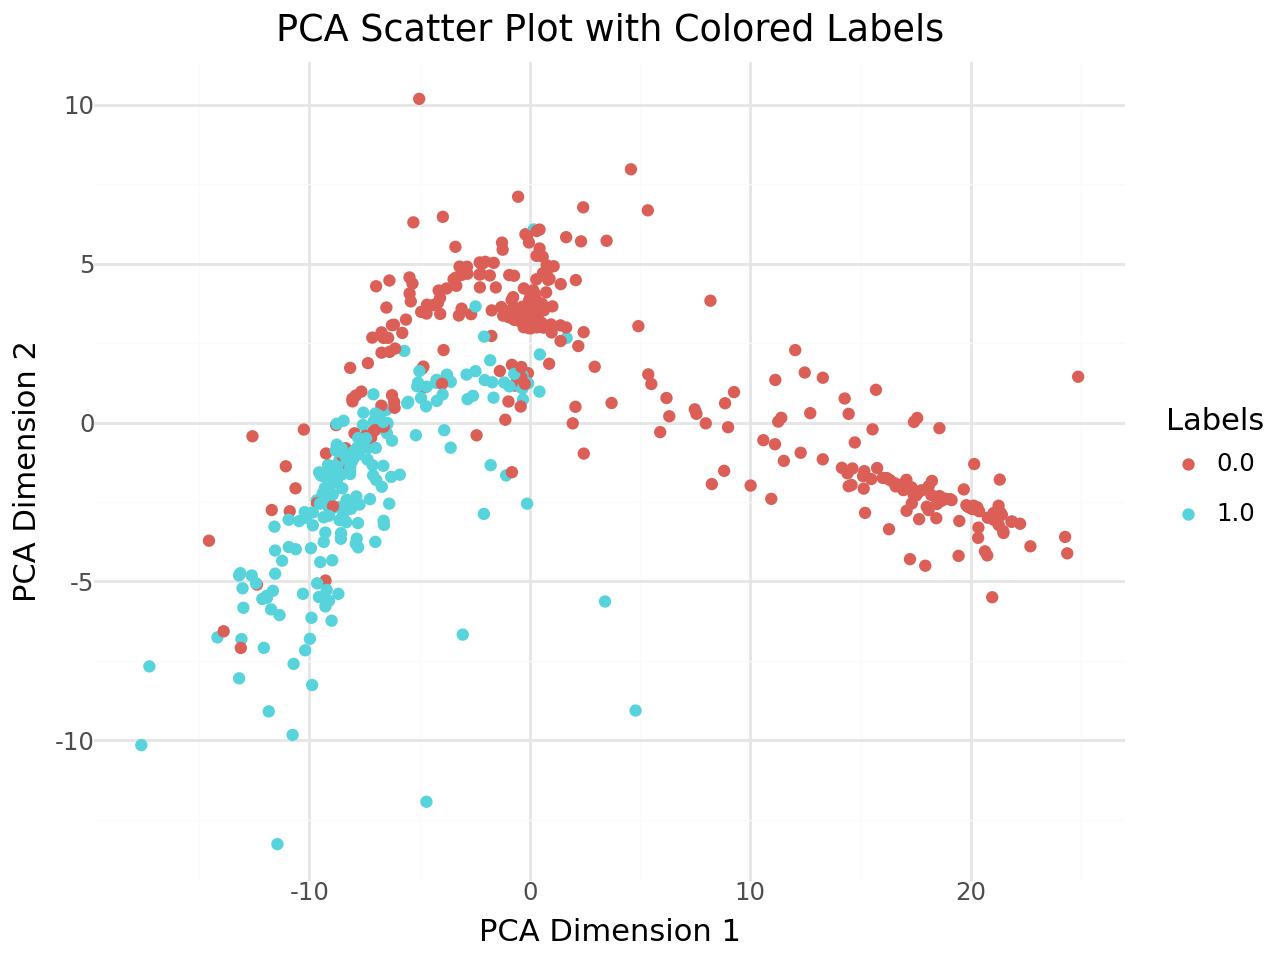

In [106]:
train_embeddings = model.transform(train_dataset)
flexynesis.plot_dim_reduced(train_embeddings, train_dataset.ann['STUDY'])

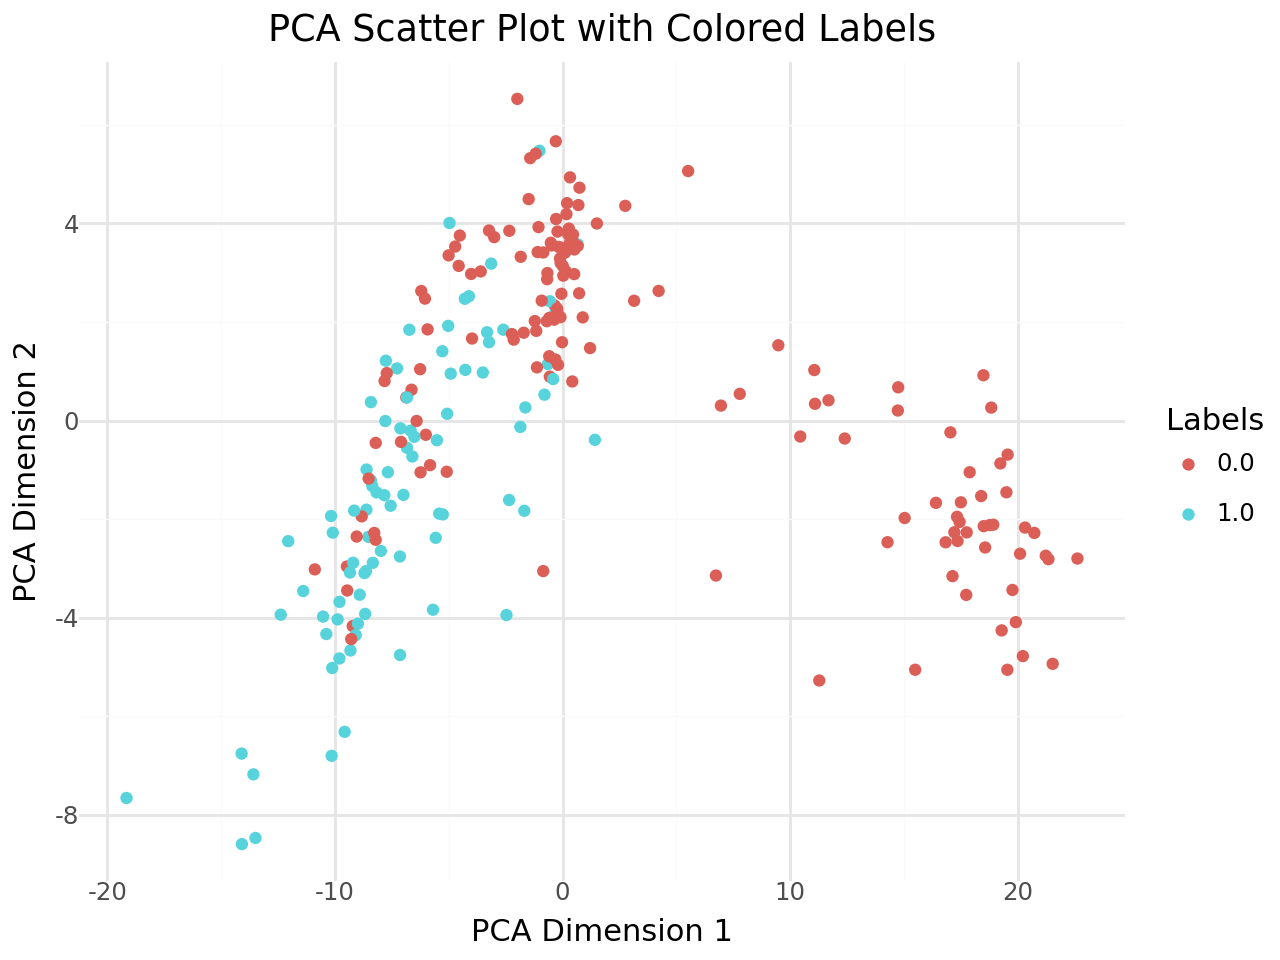

In [107]:
test_embeddings = model.transform(test_dataset)
flexynesis.plot_dim_reduced(test_embeddings, test_dataset.ann['STUDY'])

**Exercise 1**: 

Look up what Harrell's C-index means and write down a simple description of what it measures.

A: Harrell's C-index is a measure of how well a model can distinguish between different outcomes. It estimates the probability that the model's predictions are in agreement with the actual observed outcomes.



**Exercise 2**:

Now, you build a model using hyperparameter tuning (run at least 10 HPO steps) to predict the survival outcomes of patients. 
Evaluate the final model on test dataset, which computes the "C-index". 

Feel free to cheat from the tutorial available here: https://github.com/BIMSBbioinfo/flexynesis/blob/main/examples/tutorials/survival_subtypes_LGG_GBM.ipynb
See how "OS_STATUS" and "OS_MONTHS" were used. 

In [108]:
HPO_ITER = 10
tuner = flexynesis.HyperparameterTuning(train_dataset, 
                                        model_class = flexynesis.DirectPred, 
                                        config_name = "DirectPred",
                                        surv_event_var="OS_STATUS",
                                        surv_time_var="OS_MONTHS",
                                        target_variables = [], 
                                        n_iter=HPO_ITER, 
                                        plot_losses=True, 
                                        early_stop_patience=10)

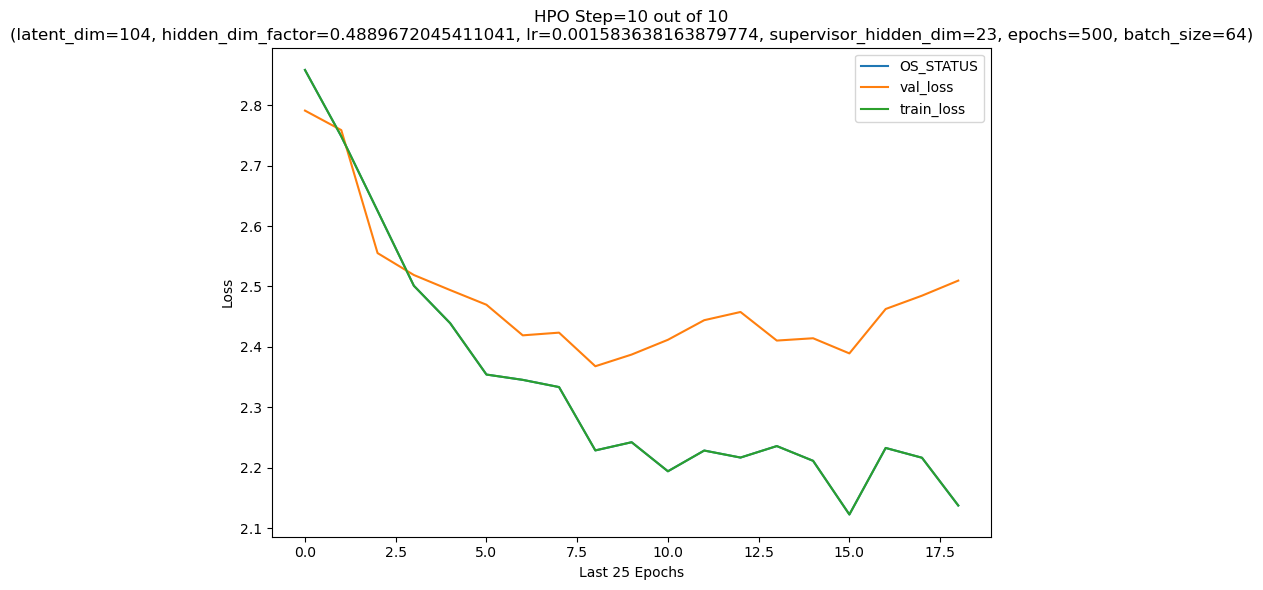

Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         OS_STATUS         │     2.509702980291215     │
│         val_loss          │     2.509702980291215     │
└───────────────────────────┴───────────────────────────┘

Tuning Progress: 100%|██████████| 10/10 [01:08<00:00,  6.89s/it, Iteration=10, Best Loss=1.95]

[INFO] current best val loss: 1.94732800982801; best params: {'latent_dim': np.int64(37), 'hidden_dim_factor': 0.4835263724738045, 'lr': 0.005499621078673044, 'supervisor_hidden_dim': np.int64(11), 'epochs': 500, 'batch_size': np.int64(32)} since 7 hpo iterations


{'latent_dim': np.int64(37),
 'hidden_dim_factor': 0.4835263724738045,
 'lr': 0.005499621078673044,
 'supervisor_hidden_dim': np.int64(11),
 'epochs': 11,
 'batch_size': np.int64(32)}

In [109]:
model, best_params = tuner.perform_tuning()
best_params

In [110]:
flexynesis.evaluate_wrapper(method = 'DirectPred', y_pred_dict=model.predict(test_dataset), dataset = test_dataset, 
                            surv_event_var=model.surv_event_var, surv_time_var=model.surv_time_var)

,method,var,variable_type,metric,value
0,DirectPred,OS_STATUS,numerical,cindex,0.729051


**Exercise 3:**

Again build a model using hyperparameter tuning to predict survival outcomes (as in Exercise 1), however, this time use additional clinical variables as targets. 


    flexynesis.HyperparameterTuning(train_dataset, 
                                    model_class = flexynesis.DirectPred, 
                                    config_name = "DirectPred",
                                    surv_event_var="OS_STATUS",
                                    surv_time_var="OS_MONTHS",
                                    target_variables = [], => What other variables can you use here? Try "AGE" and/or "HISTOLOGICAL_DIAGNOSIS" and see the model performance 
                                    ...
                                    

**See if you can get a better C-index using additional target variables.**

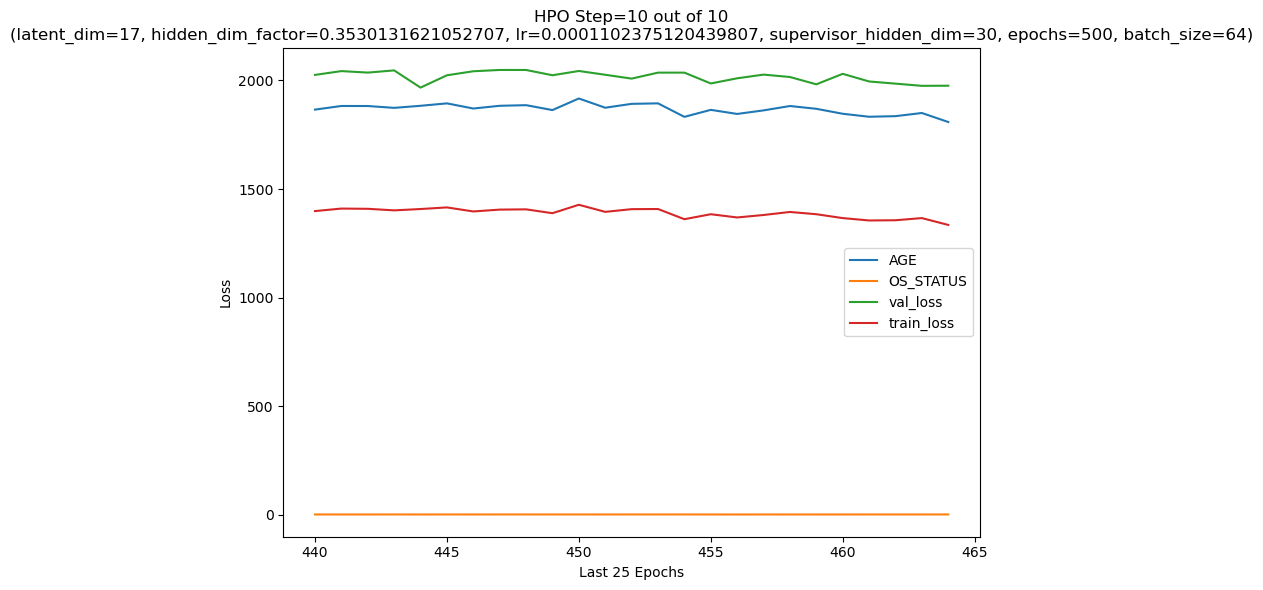

Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│            AGE            │    1972.7601318359375     │
│         OS_STATUS         │     2.598008723008723     │
│         val_loss          │    1975.3582043434337     │
└───────────────────────────┴───────────────────────────┘

Tuning Progress: 100%|██████████| 10/10 [11:52<00:00, 71.25s/it, Iteration=10, Best Loss=164]

[INFO] current best val loss: 164.401449935905; best params: {'latent_dim': np.int64(43), 'hidden_dim_factor': 0.34217623939723324, 'lr': 0.007075090951559971, 'supervisor_hidden_dim': np.int64(10), 'epochs': 500, 'batch_size': np.int64(64)} since 2 hpo iterations


,method,var,variable_type,metric,value
0,DirectPred,AGE,numerical,mse,199.587509
1,DirectPred,AGE,numerical,r2,0.251006
2,DirectPred,AGE,numerical,pearson_corr,0.501005
3,DirectPred,OS_STATUS,numerical,cindex,0.763632


In [ ]:
HPO_ITER = 10
tuner = flexynesis.HyperparameterTuning(train_dataset, 
                                        model_class = flexynesis.DirectPred, 
                                        config_name = "DirectPred",
                                        surv_event_var="OS_STATUS",
                                        surv_time_var="OS_MONTHS",
                                        target_variables = ['AGE'], 
                                        n_iter=HPO_ITER, 
                                        plot_losses=True, 
                                        early_stop_patience=20)

model, best_params = tuner.perform_tuning()
print (best_params)
flexynesis.evaluate_wrapper(method = 'DirectPred', y_pred_dict=model.predict(test_dataset), dataset = test_dataset, 
                            surv_event_var=model.surv_event_var, surv_time_var=model.surv_time_var)

In [112]:
print (best_params)


{'latent_dim': np.int64(43), 'hidden_dim_factor': 0.34217623939723324, 'lr': 0.007075090951559971, 'supervisor_hidden_dim': np.int64(10), 'epochs': 89, 'batch_size': np.int64(64)}


## 3.2 Survival-risk subtypes 

In [113]:
# get model outputs for survival variable 
outputs = model.predict(test_dataset)['OS_STATUS'].flatten() 
risk_scores = np.exp(outputs)
# Define quantile thresholds
quantiles = np.quantile(risk_scores, [0.5])
# Assign groups based on quantiles
groups = np.digitize(risk_scores, quantiles)

In [120]:
quantiles

array([0.33250049])

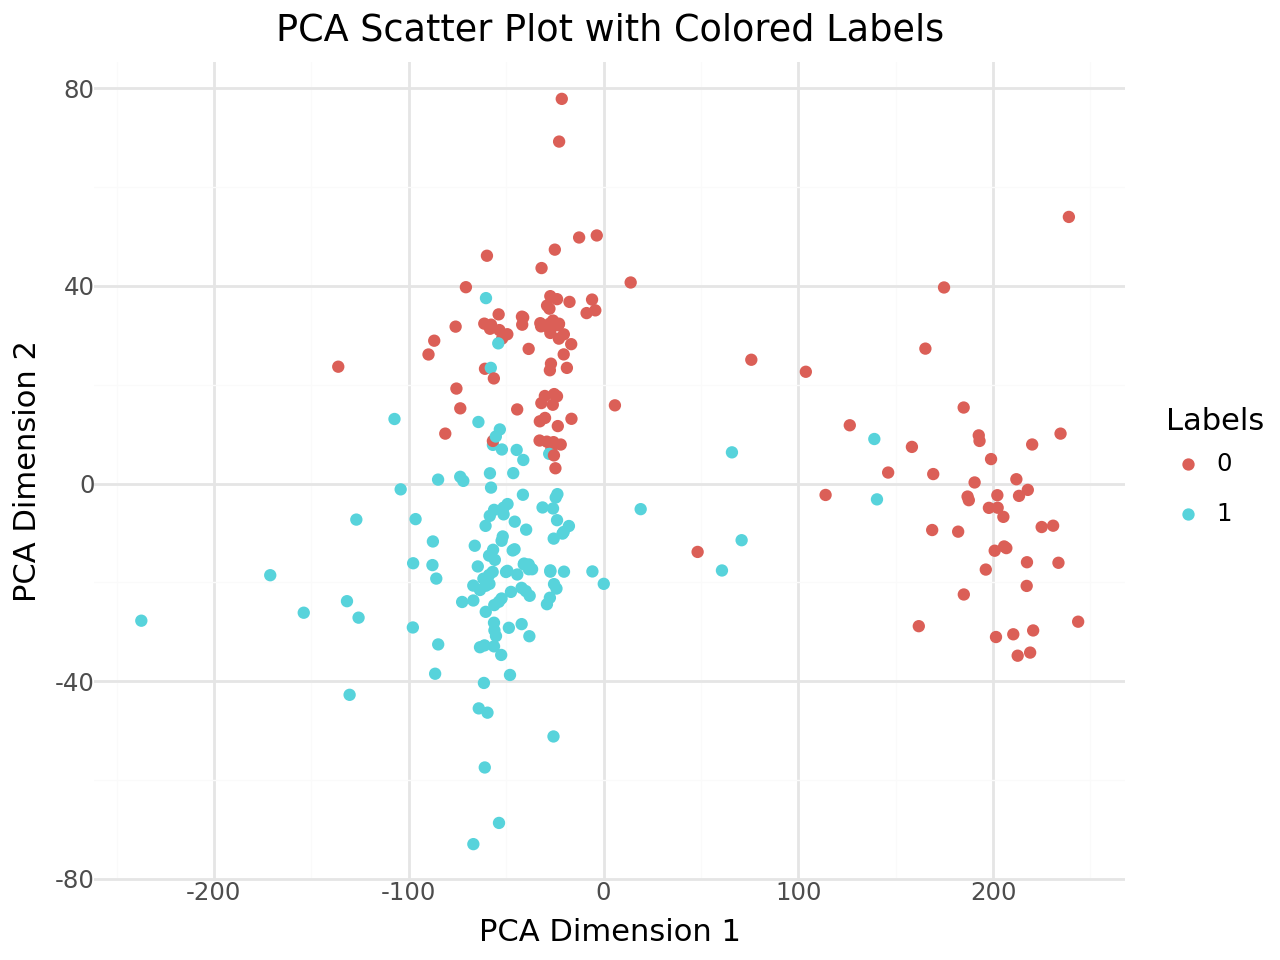

In [114]:
# Extract sample embeddings 
E = model.transform(test_dataset)
flexynesis.plot_dim_reduced(E, groups)

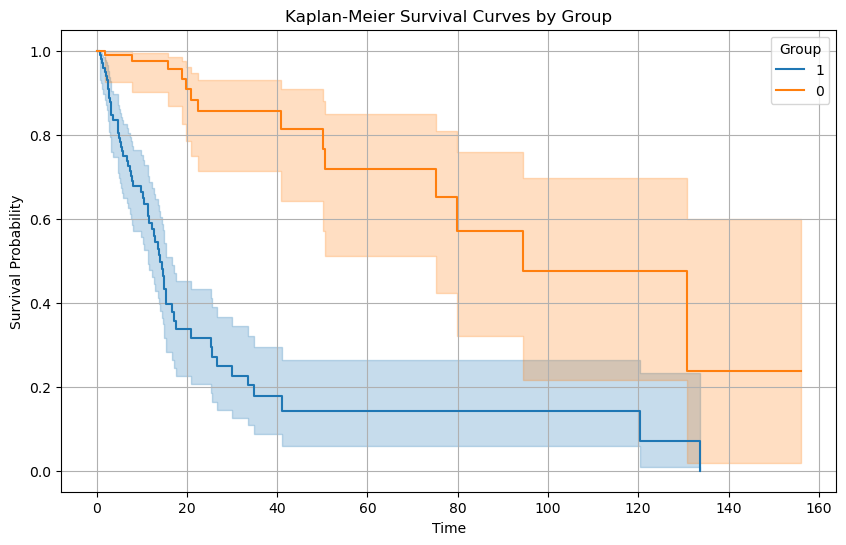

In [122]:
# remove samples with NA values first 
durations = test_dataset.ann['OS_MONTHS']
events = test_dataset.ann['OS_STATUS']
valid_indices = ~torch.isnan(durations) & ~torch.isnan(events)
flexynesis.plot_kaplan_meier_curves(durations[valid_indices], events[valid_indices], groups[valid_indices]) 

### Finding survival-associated markers 

We can also compute feature importance scores for prediction of overall survival. 

In [126]:
model.compute_feature_importance(train_dataset, 'OS_STATUS')

In [127]:
# get top 10 features 
flexynesis.get_important_features(model, var = 'OS_STATUS', top=10)

,target_variable,target_class,target_class_label,layer,name,importance
0,OS_STATUS,0,,mut,IDH1,0.521073
1,OS_STATUS,0,,mut,ATRX,0.317648
2,OS_STATUS,0,,mut,TP53,0.095301
3,OS_STATUS,0,,mut,IDH2,0.072054
4,OS_STATUS,0,,mut,NF1,0.070837
5,OS_STATUS,0,,cna,MIR603,0.045650
6,OS_STATUS,0,,mut,MUC16,0.037506
7,OS_STATUS,0,,mut,CIC,0.028655
8,OS_STATUS,0,,mut,COL6A3,0.023311
9,OS_STATUS,0,,mut,PIK3CA,0.020814


### Comparing top markers with clinical covariates 

Let's build a linear Cox-PH model including the top 5 markers and other clinical variables such as histological diagnosis, disease type (STUDY), age, and sex. 

In [128]:
# define a data.frame with clinical covariates and top markers along with survival endpoints 
vars = ['AGE', 'SEX', 'HISTOLOGICAL_DIAGNOSIS', 'STUDY', 'OS_MONTHS', 'OS_STATUS']
# read clinical variables 
df_clin = pd.concat(
    [pd.DataFrame({x: train_dataset.ann[x] for x in vars}, index=train_dataset.samples),
     pd.DataFrame({x: test_dataset.ann[x] for x in vars}, index=test_dataset.samples)], 
    axis = 0)
# get top 5 survival markers and extract the input data for these markers for both training and test data
imp = flexynesis.get_important_features(model, var = 'OS_STATUS', top=5) 
df_imp = pd.concat([train_dataset.get_feature_subset(imp), test_dataset.get_feature_subset(imp)], axis=0)  

# combine markers with clinical variables
df = pd.concat([df_imp, df_clin], axis = 1)
# remove samples without survival endpoints
df = df[df['OS_STATUS'].notna()]
df

,mut_IDH1,mut_ATRX,mut_TP53,mut_IDH2,mut_NF1,AGE,SEX,HISTOLOGICAL_DIAGNOSIS,STUDY,OS_MONTHS,OS_STATUS
TCGA-TM-A84R,-1.018150,-0.585658,-0.809174,6.733003,-0.267004,46.0,1.0,3.0,0.0,9.4,0.0
TCGA-DU-A5TU,0.982173,1.707482,1.235829,-0.148522,-0.267004,62.0,0.0,0.0,0.0,3.6,0.0
TCGA-28-5204,-1.018150,-0.585658,-0.809174,-0.148522,-0.267004,72.0,1.0,1.0,1.0,14.9,1.0
TCGA-HT-7477,0.982173,1.707482,1.235829,-0.148522,-0.267004,62.0,1.0,0.0,0.0,24.2,0.0
TCGA-S9-A6UB,0.982173,-0.585658,-0.809174,-0.148522,-0.267004,52.0,1.0,3.0,0.0,103.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DU-5874,0.982173,-0.585658,-0.809174,-0.148522,-0.267004,62.0,0.0,3.0,0.0,15.1,0.0
TCGA-76-6663,-1.018150,-0.585658,-0.809174,-0.148522,3.745267,44.0,0.0,1.0,1.0,7.7,0.0
TCGA-27-2526,-1.018150,-0.585658,-0.809174,-0.148522,-0.267004,79.0,0.0,1.0,1.0,2.9,1.0
TCGA-CS-6667,0.982173,-0.585658,1.235829,-0.148522,-0.267004,39.0,0.0,0.0,0.0,7.6,0.0


No low variance features were removed based on event conditioning.


/public/home/liujunwu/software/miniconda3/envs/ame/lib/python3.11/site-packages/flexynesis/utils.py:765: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


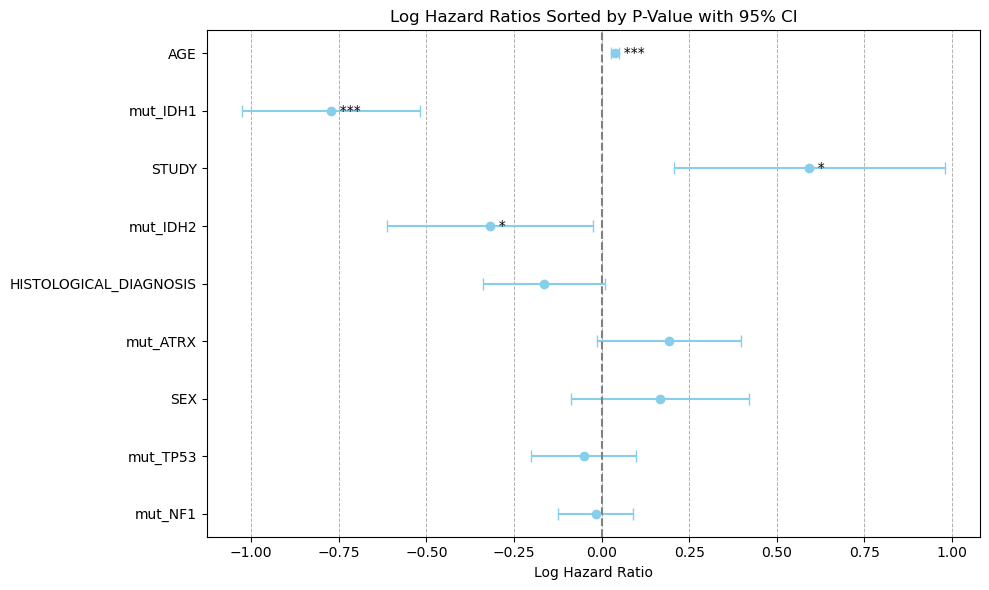

In [129]:
# build a cox model
coxm = flexynesis.build_cox_model(df, 'OS_MONTHS', 'OS_STATUS')
# visualize log-hazard ratios sorted by p-values
flexynesis.plot_hazard_ratios(coxm)

In [137]:
coxm.print_summary()

<lifelines.CoxPHFitter: fitted with 729 total observations, 466 right-censored observations>
             duration col = 'OS_MONTHS'
                event col = 'OS_STATUS'
      baseline estimation = breslow
   number of observations = 729
number of events observed = 263
   partial log-likelihood = -1284.04
         time fit was run = 2025-03-12 06:27:59 UTC

---
                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                               
mut_IDH1               -0.77      0.46      0.13           -1.03           -0.52                0.36                0.60
mut_ATRX                0.19      1.21      0.10           -0.01            0.40                0.99                1.49
mut_TP53               -0.05      0.95      0.08           -0.20            0.10                0.82                1.10
mut_IDH2               -0.32      0.73      0.15           -0.61           -0.02                0.54                0.98
mut_NF1                -0.02      0.98      0.05           -0.12            0.09                0.88                1.09
AGE                     0.04      1.04      0.01            0.03            0.05                1.03                1.05
SEX                     0.17      1.18      0.13           -0.09            0.42                0.92                1.52
HISTOLOGICAL_DIAGNOSIS -0.17      0.85      0.09           -0.34            0.01                0.71                1.01
STUDY                   0.59      1.81      0.20            0.21            0.98                1.23                2.66

                        cmp to     z      p  -log2(p)
covariate                                            
mut_IDH1                  0.00 -5.95 <0.005     28.50
mut_ATRX                  0.00  1.83   0.07      3.89
mut_TP53                  0.00 -0.66   0.51      0.97
mut_IDH2                  0.00 -2.13   0.03      4.90
mut_NF1                   0.00 -0.30   0.76      0.39
AGE                       0.00  6.53 <0.005     33.84
SEX                       0.00  1.28   0.20      2.32
HISTOLOGICAL_DIAGNOSIS    0.00 -1.86   0.06      4.00
STUDY                     0.00  3.01 <0.005      8.56
---
Concordance = 0.84
Partial AIC = 2586.07
log-likelihood ratio test = 377.65 on 9 df
-log2(p) of ll-ratio test = 249.46

## 3.3 Final Exercise

- Inspect the top 10 markers from section 3.2 and see if they have been characterized in the literature as important markers for Glioma disease progression. 

1. IDH1/IDH2 & ATRX & NF1 mutation have been characterized in the literatures as important markers for Glioma disease progression. 
2. a few literatures characterized MUC16/CIC/PIK3CA mutation associated with worse prognosis.
3. MIR603 cnv/COL6A3 mutation have not been characterized.